
### ANN --

* Study 
    - https://www.asimovinstitute.org/neural-network-zoo/
    - https://www.ibm.com/topics/recurrent-neural-networks
    - https://colah.github.io/posts/2015-08-Understanding-LSTMs/



 - Perceptron 
 - Multi Layer Perceptron --- MLP



##### SEQUENCE MODELS----Recurrent NN ---->>> Long Short TM 

* NLP : Natural langugage processing
    - NLU
    - NLG

* BOTS
    - CHATBOTS , Question Answer Machine , REGEX-- us/usa/U.S.A. ---> POS tagging
    - VOICEBOTS

###### Refer Some Great Work here --
* Google DEEPMIND -- BARD AI using Language Model for Dialogue Applications (LaMDA)
* OPEN AI -- CHATGPT using GPT-3  -- https://chat.openai.com/chat
  

  
IMAGE ANALYSIS------ 

* Model Name --> Convolutional NN == CNN == DCN

    - object detection
    - object identification/recognition
    - object segmentation
    - image classification
    - VIDEO analytics--- images frame by frame


Refer Some Great Work here --
* Google DEEPMIND
* OPEN AI -- DALL-E -  https://labs.openai.com/
* DEEPFAKE - https://deepfakesweb.com/







HYBRID MODELS
* CNN + RNN

* NEURALINK - https://www.youtube.com/watch?v=Gv_XB6Hf6gM&t=212s







    
    
Hardware Needs    -- 
    
* CPU   
* GPU
* TPU

# ----------------------------------------------------------------------------

In [92]:
# LSTM for international airline passengers problem with regression framing

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from pandas import read_csv



In [93]:

import math

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error


In [94]:


import site

site.getsitepackages()

['C:\\Users\\admin\\anaconda3',
 'C:\\Users\\admin\\anaconda3\\lib\\site-packages']

In [95]:
#pip install keras
#pip install tensorflow

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM


In [96]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)



In [97]:

# fix random seed for reproducibility
np.random.seed(7)
# load the dataset

dataframe  = pd.read_csv('international-airline-passengers.csv',usecols=[1], engine='python')

#dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')

dataframe

,112
0,118
1,132
2,129
3,121
4,135
...,...
138,606
139,508
140,461
141,390


In [98]:

dataset = dataframe.values
dataset = dataset.astype('float32')

dataset

array([[118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [302.],
       [29

In [99]:

# normalize the dataset

scaler = MinMaxScaler(feature_range=(0, 1))

dataset = scaler.fit_transform(dataset)
dataset

array([[0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374519],
       [0.177

In [100]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)

test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [101]:
train

array([[0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374519],
       [0.177

In [102]:
test

array([[0.4073359 ],
       [0.3803089 ],
       [0.48648646],
       [0.47104248],
       [0.484556  ],
       [0.6138996 ],
       [0.6969112 ],
       [0.70077217],
       [0.57915056],
       [0.46911195],
       [0.38803086],
       [0.44787642],
       [0.45559844],
       [0.4131274 ],
       [0.4980695 ],
       [0.47104248],
       [0.49999997],
       [0.6389961 ],
       [0.7471043 ],
       [0.7741313 ],
       [0.57915056],
       [0.492278  ],
       [0.3976834 ],
       [0.44980696],
       [0.49420848],
       [0.45945945],
       [0.5830116 ],
       [0.5637065 ],
       [0.61003864],
       [0.71042466],
       [0.8571429 ],
       [0.8783784 ],
       [0.69305015],
       [0.5849421 ],
       [0.4980695 ],
       [0.58108103],
       [0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ],
       [0.55212355],
       [0.633

In [103]:


# reshape into X=t and Y=t+1

look_back = 1

trainX, trainY = create_dataset(train, look_back)

trainX

array([[0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374519],
       [0.177

In [104]:
trainY

array([0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207,
       0.08494207, 0.06177607, 0.02895753, 0.        , 0.02702703,
       0.02123553, 0.04247104, 0.07142857, 0.05984557, 0.04054055,
       0.08687258, 0.12741312, 0.12741312, 0.10424709, 0.05598456,
       0.01930502, 0.06949806, 0.07915059, 0.08880308, 0.14285713,
       0.11389962, 0.13127413, 0.14285713, 0.18339768, 0.18339768,
       0.15444016, 0.11196911, 0.08108109, 0.1196911 , 0.12934363,
       0.14671814, 0.17181468, 0.14864865, 0.15250966, 0.22007722,
       0.24324325, 0.26640925, 0.2027027 , 0.16795367, 0.13127413,
       0.17374519, 0.17760617, 0.17760617, 0.25482625, 0.25289574,
       0.24131274, 0.26833975, 0.3088803 , 0.32432434, 0.25675675,
       0.20656371, 0.14671814, 0.18725869, 0.19305018, 0.16216215,
       0.25289574, 0.23745173, 0.25096524, 0.3088803 , 0.38223937,
       0.36486486, 0.2992278 , 0.24131274, 0.1911197 , 0.24131274,
       0.26640925, 0.24903473, 0.31467178, 0.3185328 , 0.32046


# reshape input to be [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))


In [105]:
testX, testY = create_dataset(test, look_back)



testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [106]:
testX

array([[0.4073359 ],
       [0.3803089 ],
       [0.48648646],
       [0.47104248],
       [0.484556  ],
       [0.6138996 ],
       [0.6969112 ],
       [0.70077217],
       [0.57915056],
       [0.46911195],
       [0.38803086],
       [0.44787642],
       [0.45559844],
       [0.4131274 ],
       [0.4980695 ],
       [0.47104248],
       [0.49999997],
       [0.6389961 ],
       [0.7471043 ],
       [0.7741313 ],
       [0.57915056],
       [0.492278  ],
       [0.3976834 ],
       [0.44980696],
       [0.49420848],
       [0.45945945],
       [0.5830116 ],
       [0.5637065 ],
       [0.61003864],
       [0.71042466],
       [0.8571429 ],
       [0.8783784 ],
       [0.69305015],
       [0.5849421 ],
       [0.4980695 ],
       [0.58108103],
       [0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ]], dtype=float32)

In [107]:

#FEED FORWARD NETWORK 

#BACK PROPAGATION PROCESS -- weight adjustments



In [108]:




# create and fit the LSTM network
model = Sequential()

model.add(LSTM(4, input_shape=(1, look_back)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', 
              optimizer='adam')


In [109]:

model.fit(trainX, trainY, 
          epochs=100, 
          batch_size=1, 
          verbose=2)


Epoch 1/100
93/93 - 2s - loss: 0.0441 - 2s/epoch - 17ms/step
Epoch 2/100
93/93 - 0s - loss: 0.0203 - 122ms/epoch - 1ms/step
Epoch 3/100
93/93 - 0s - loss: 0.0142 - 117ms/epoch - 1ms/step
Epoch 4/100
93/93 - 0s - loss: 0.0128 - 134ms/epoch - 1ms/step
Epoch 5/100
93/93 - 0s - loss: 0.0118 - 117ms/epoch - 1ms/step
Epoch 6/100
93/93 - 0s - loss: 0.0109 - 133ms/epoch - 1ms/step
Epoch 7/100
93/93 - 0s - loss: 0.0098 - 132ms/epoch - 1ms/step
Epoch 8/100
93/93 - 0s - loss: 0.0089 - 133ms/epoch - 1ms/step
Epoch 9/100
93/93 - 0s - loss: 0.0079 - 119ms/epoch - 1ms/step
Epoch 10/100
93/93 - 0s - loss: 0.0070 - 156ms/epoch - 2ms/step
Epoch 11/100
93/93 - 0s - loss: 0.0062 - 130ms/epoch - 1ms/step
Epoch 12/100
93/93 - 0s - loss: 0.0054 - 116ms/epoch - 1ms/step
Epoch 13/100
93/93 - 0s - loss: 0.0047 - 140ms/epoch - 2ms/step
Epoch 14/100
93/93 - 0s - loss: 0.0040 - 151ms/epoch - 2ms/step
Epoch 15/100
93/93 - 0s - loss: 0.0036 - 125ms/epoch - 1ms/step
Epoch 16/100
93/93 - 0s - loss: 0.0032 - 118ms/epoc

In [151]:
model.layers

In [152]:
model.weights

[<tf.Variable 'lstm_2/lstm_cell_2/kernel:0' shape=(1, 16) dtype=float32, numpy=
 array([[ 1.0420954 ,  0.02532284,  0.46237054,  0.5364734 , -0.18505466,
          0.48645508, -0.14619866,  0.5713413 , -0.7543586 , -0.65990305,
         -1.187479  , -0.0487445 ,  0.39949346,  0.9137448 ,  0.84192514,
         -0.33634254]], dtype=float32)>,
 <tf.Variable 'lstm_2/lstm_cell_2/recurrent_kernel:0' shape=(4, 16) dtype=float32, numpy=
 array([[-0.41407943,  0.5201705 , -0.28487816,  0.12026092, -0.12981313,
         -0.00281664, -0.14417054,  0.08138992, -0.05083147,  0.27867   ,
         -0.3943621 , -0.05688989,  0.0670524 ,  0.40143055, -0.0919363 ,
          0.07057228],
        [ 0.03600494, -0.05393905,  0.28339067, -0.02441129, -0.03963554,
          0.61229986,  0.29021206,  0.11752529, -0.19486444,  0.05162194,
         -0.03432012,  0.20694873, -0.19506094,  0.44085738,  0.12203712,
         -0.32928872],
        [-0.03005351, -0.11518665,  0.20042533,  0.15185782, -0.16077048,
   

In [154]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4)                 96        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


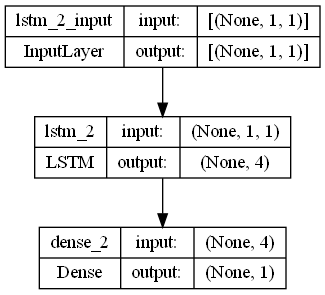

In [150]:
from keras.utils import plot_model

plot_model(model, to_file='TS_LSTM_model.png', show_shapes=True, show_layer_names=True)


In [110]:

# make predictions

trainPredict = model.predict(trainX)
trainPredict



3/3 [==============================] - 0s 0s/step


array([[0.05692277],
       [0.08043436],
       [0.07535429],
       [0.06191844],
       [0.08553653],
       [0.10789109],
       [0.10789109],
       [0.0872421 ],
       [0.05858537],
       [0.03393225],
       [0.05692277],
       [0.05195104],
       [0.07029669],
       [0.09580549],
       [0.08553653],
       [0.06861591],
       [0.10962658],
       [0.14655335],
       [0.14655335],
       [0.1253426 ],
       [0.08213266],
       [0.05029919],
       [0.0940881 ],
       [0.10269801],
       [0.11136426],
       [0.16084386],
       [0.13414615],
       [0.15011518],
       [0.16084386],
       [0.19885863],
       [0.19885863],
       [0.17163451],
       [0.13238147],
       [0.10442682],
       [0.13945203],
       [0.14833334],
       [0.16443403],
       [0.18792881],
       [0.16623168],
       [0.16983192],
       [0.23377818],
       [0.25603586],
       [0.27841663],
       [0.21718292],
       [0.18429711],
       [0.15011518],
       [0.18974687],
       [0.193

In [111]:

testPredict = model.predict(testX)

testPredict

2/2 [==============================] - 0s 3ms/step


array([[0.41563267],
       [0.3893226 ],
       [0.49208713],
       [0.47726423],
       [0.49023739],
       [0.6117108 ],
       [0.68633354],
       [0.6897296 ],
       [0.5796313 ],
       [0.4754076 ],
       [0.39684594],
       [0.45493358],
       [0.462389  ],
       [0.4212611 ],
       [0.5031667 ],
       [0.47726423],
       [0.5050099 ],
       [0.63458323],
       [0.7299301 ],
       [0.75289464],
       [0.5796313 ],
       [0.49763113],
       [0.4062438 ],
       [0.45679855],
       [0.4994772 ],
       [0.46611238],
       [0.5832182 ],
       [0.5652308 ],
       [0.60816944],
       [0.6981894 ],
       [0.82108754],
       [0.8379499 ],
       [0.68293035],
       [0.5850095 ],
       [0.5031667 ],
       [0.58142537],
       [0.60284626],
       [0.5561885 ],
       [0.6063964 ],
       [0.6795205 ],
       [0.69818944],
       [0.80085063],
       [0.9298467 ],
       [0.90726596],
       [0.7577676 ],
       [0.6795205 ]], dtype=float32)

In [112]:

# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)



In [113]:
trainPredict

array([[133.486  ],
       [145.665  ],
       [143.03354],
       [136.07375],
       [148.30792],
       [159.88759],
       [159.88759],
       [149.1914 ],
       [134.34723],
       [121.5769 ],
       [133.486  ],
       [130.91064],
       [140.41368],
       [153.62724],
       [148.30792],
       [139.54305],
       [160.78656],
       [179.91464],
       [179.91464],
       [168.92746],
       [146.54472],
       [130.05498],
       [152.73764],
       [157.19757],
       [161.68669],
       [187.31712],
       [173.4877 ],
       [181.75966],
       [187.31712],
       [207.00877],
       [207.00877],
       [192.9067 ],
       [172.57361],
       [158.0931 ],
       [176.23615],
       [180.83667],
       [189.17683],
       [201.34714],
       [190.108  ],
       [191.97293],
       [225.09709],
       [236.62659],
       [248.21982],
       [216.50075],
       [199.46591],
       [181.75966],
       [202.2889 ],
       [204.17464],
       [204.17464],
       [242.41614],


In [115]:

trainY = scaler.inverse_transform([trainY])
trainY

array([[131.99999879, 129.00000163, 120.99999632, 135.00000368,
        147.99999397, 147.99999397, 136.00000531, 119.00000078,
        103.99999952, 117.99999916, 115.00000199, 125.99999674,
        140.99999801, 135.00000368, 125.00000283, 148.9999956 ,
        169.99999891, 169.99999891, 157.99999481, 133.00000042,
        114.00000036, 139.99999638, 145.00000452, 149.99999723,
        177.9999965 , 163.00000295, 172.00000217, 177.9999965 ,
        198.99999982, 198.99999982, 184.00000627, 162.00000133,
        146.00000615, 165.9999924 , 171.00000054, 179.99999976,
        193.00000549, 181.00000139, 183.00000464, 217.99999988,
        230.00000398, 241.99999264, 209.00000066, 191.00000223,
        172.00000217, 194.00000712, 195.99999493, 195.99999493,
        235.99999831, 234.99999668, 229.00000235, 242.99999427,
        263.99999759, 272.00001061, 236.99999994, 211.00000392,
        179.99999976, 201.00000308, 203.99999252, 187.99999735,
        234.99999668, 226.9999991 , 233.

In [116]:

testPredict = scaler.inverse_transform(testPredict)

testPredict

array([[319.29773],
       [305.66913],
       [358.90112],
       [351.2229 ],
       [357.94296],
       [420.86618],
       [459.52075],
       [461.2799 ],
       [404.24902],
       [350.26114],
       [309.5662 ],
       [339.6556 ],
       [343.5175 ],
       [322.21326],
       [364.64032],
       [351.2229 ],
       [365.59512],
       [432.7141 ],
       [482.10382],
       [493.99942],
       [404.24902],
       [361.77295],
       [314.43427],
       [340.62164],
       [362.72922],
       [345.4462 ],
       [406.10703],
       [396.78958],
       [419.03177],
       [465.66208],
       [529.32336],
       [538.05804],
       [457.7579 ],
       [407.03494],
       [364.64032],
       [405.17838],
       [416.27435],
       [392.10568],
       [418.11334],
       [455.9916 ],
       [465.66214],
       [518.84064],
       [585.66064],
       [573.9638 ],
       [496.52365],
       [455.9916 ]], dtype=float32)

In [118]:
testY = scaler.inverse_transform([testY])
testY

array([[301.00001152, 355.999993  , 348.00001085, 355.00000681,
        421.9999924 , 465.0000161 , 466.99998848, 403.99999397,
        346.99999379, 304.99998716, 335.99999132, 339.99999783,
        317.99999288, 362.00000277, 348.00001085, 362.99998896,
        434.99999813, 491.00002756, 505.00001948, 403.99999397,
        359.00001333, 310.00001073, 337.00000838, 359.99999952,
        342.00000109, 406.0000281 , 395.99998094, 420.00002002,
        471.99998119, 548.00004318, 559.00001477, 462.99998197,
        407.00001429, 362.00000277, 404.99998016, 416.9999997 ,
        390.99998824, 418.99997208, 461.00000959, 471.99998119,
        535.00003745, 622.00000929, 606.00004499, 507.99997805,
        461.00000959, 390.00000205]])

In [119]:

# calculate root mean squared error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))

print('Train Score: %.2f RMSE' % (trainScore))


Train Score: 23.93 RMSE


In [120]:

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

print('Test Score: %.2f RMSE' % (testScore))

Test Score: 46.63 RMSE


In [125]:

np.empty_like([2, 2,22], dtype = int)

array([650596056,       400, 653469216])

In [129]:

# shift train predictions for plotting

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot

array([[ 1.40129846e-45],
       [ 0.00000000e+00],
       [-7.64329600e+06],
       [ 4.59121429e-41],
       [ 7.35681694e-43],
       [ 0.00000000e+00],
       [            nan],
       [            nan],
       [-5.87798906e+04],
       [ 4.59121429e-41],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.35631564e-19],
       [ 4.50713181e+16],
       [ 6.33692210e-10],
       [ 6.40969056e-10],
       [ 8.14240168e-13],
       [ 3.14327384e-12],
       [ 1.35631280e-19],
       [ 1.35631564e-19],
       [ 4.00465043e-11],
       [ 6.40969056e-10],
       [ 5.20015877e+22],
       [ 7.93480914e+17],
       [ 1.35558927e-19],
       [ 1.35631564e-19],
       [ 1.49343123e-07],
       [ 1.71553182e-07],
       [ 2.63692024e-09],
       [ 1.67803208e-07],
       [ 1.17037333e-19],
       [ 1.35631564e-19],
       [ 1.85606508e-19],
       [ 6.40940634e-10],
       [ 6.40969056e-10],
       [ 6.23532337e-10],
       [ 8.29902538e-33],
       [ 1.35631564e-19],
       [ 4.5

In [130]:

trainPredictPlot[:, :] = np.nan

trainPredictPlot

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [132]:
trainPredict

array([[133.486  ],
       [145.665  ],
       [143.03354],
       [136.07375],
       [148.30792],
       [159.88759],
       [159.88759],
       [149.1914 ],
       [134.34723],
       [121.5769 ],
       [133.486  ],
       [130.91064],
       [140.41368],
       [153.62724],
       [148.30792],
       [139.54305],
       [160.78656],
       [179.91464],
       [179.91464],
       [168.92746],
       [146.54472],
       [130.05498],
       [152.73764],
       [157.19757],
       [161.68669],
       [187.31712],
       [173.4877 ],
       [181.75966],
       [187.31712],
       [207.00877],
       [207.00877],
       [192.9067 ],
       [172.57361],
       [158.0931 ],
       [176.23615],
       [180.83667],
       [189.17683],
       [201.34714],
       [190.108  ],
       [191.97293],
       [225.09709],
       [236.62659],
       [248.21982],
       [216.50075],
       [199.46591],
       [181.75966],
       [202.2889 ],
       [204.17464],
       [204.17464],
       [242.41614],


In [131]:
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

trainPredictPlot


array([[      nan],
       [133.486  ],
       [145.665  ],
       [143.03354],
       [136.07375],
       [148.30792],
       [159.88759],
       [159.88759],
       [149.1914 ],
       [134.34723],
       [121.5769 ],
       [133.486  ],
       [130.91064],
       [140.41368],
       [153.62724],
       [148.30792],
       [139.54305],
       [160.78656],
       [179.91464],
       [179.91464],
       [168.92746],
       [146.54472],
       [130.05498],
       [152.73764],
       [157.19757],
       [161.68669],
       [187.31712],
       [173.4877 ],
       [181.75966],
       [187.31712],
       [207.00877],
       [207.00877],
       [192.9067 ],
       [172.57361],
       [158.0931 ],
       [176.23615],
       [180.83667],
       [189.17683],
       [201.34714],
       [190.108  ],
       [191.97293],
       [225.09709],
       [236.62659],
       [248.21982],
       [216.50075],
       [199.46591],
       [181.75966],
       [202.2889 ],
       [204.17464],
       [204.17464],


In [140]:
trainPredict

array([[133.486  ],
       [145.665  ],
       [143.03354],
       [136.07375],
       [148.30792],
       [159.88759],
       [159.88759],
       [149.1914 ],
       [134.34723],
       [121.5769 ],
       [133.486  ],
       [130.91064],
       [140.41368],
       [153.62724],
       [148.30792],
       [139.54305],
       [160.78656],
       [179.91464],
       [179.91464],
       [168.92746],
       [146.54472],
       [130.05498],
       [152.73764],
       [157.19757],
       [161.68669],
       [187.31712],
       [173.4877 ],
       [181.75966],
       [187.31712],
       [207.00877],
       [207.00877],
       [192.9067 ],
       [172.57361],
       [158.0931 ],
       [176.23615],
       [180.83667],
       [189.17683],
       [201.34714],
       [190.108  ],
       [191.97293],
       [225.09709],
       [236.62659],
       [248.21982],
       [216.50075],
       [199.46591],
       [181.75966],
       [202.2889 ],
       [204.17464],
       [204.17464],
       [242.41614],


In [133]:

# shift test predictions for plotting

testPredictPlot = np.empty_like(dataset)

testPredictPlot[:, :] = np.nan

testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
testPredictPlot

array([[      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],


In [138]:
testPredictPlot

array([[      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],


In [146]:

# shift test predictions for plotting

testPredictPlotY = np.empty_like(dataset)

testPredictPlotY[:, :] = np.nan

testPredictPlotY[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testY.reshape(46,1)
testPredictPlotY

array([[      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],


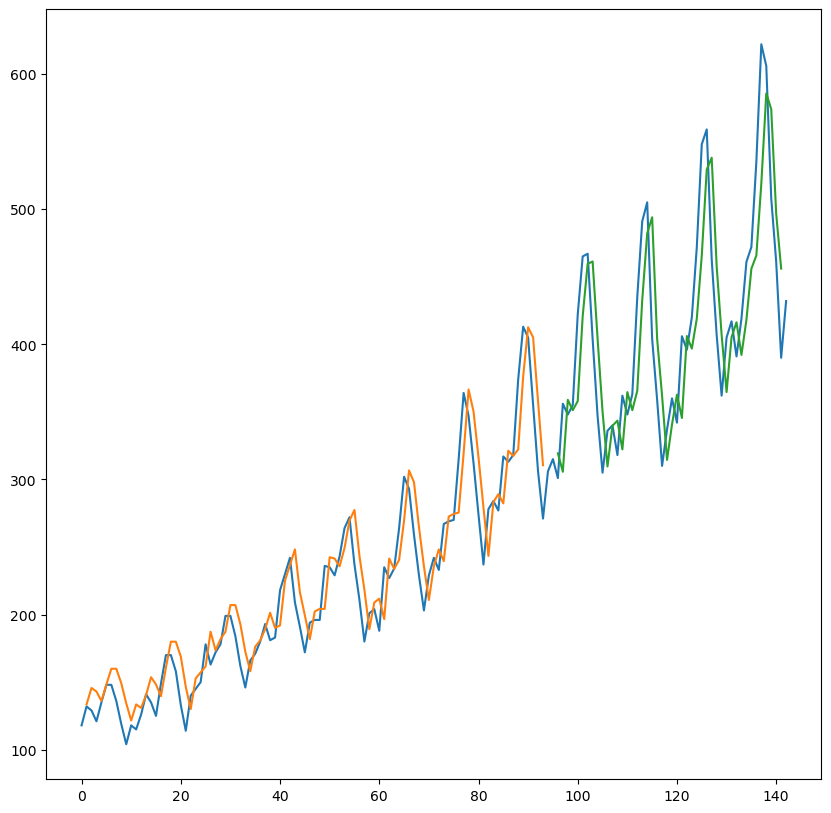

In [149]:

# plot baseline and predictions

plt.figure(figsize=(10,10))

plt.plot(scaler.inverse_transform(dataset))

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
#plt.plot(testPredictPlotY)

plt.show()